# VGG16

# Transfer Learning using vgg16

Explanation and justification are writen with each line. (Check comments)

Importing Library to build CNN for Lung Cancer Classification Using VGG16 architecture. 

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten # Layers to construct NN
from keras.models import Model # Here "Model" is a class to define arct. of NN model 
from keras.applications.vgg16 import VGG16 # Importing pre-trainied CNN acrt from Keras
from keras.applications.vgg16 import preprocess_input # "preprocess_input" is a function taken from Keras
from keras.preprocessing import image # "image" is a class for loading & processing img data & testing CNN
from keras.preprocessing.image import ImageDataGenerator # for data augmentation and "ImageDataGenerator" is a class for loading & processing img data & testing CNN
from keras.models import Sequential # "Sequential" is a class used for linear stack of layers in NN
import numpy as np # NUmPy library 
from glob import glob
import matplotlib.pyplot as plt # For creating visualization 
import os # Interact with operating systemproviding a way to interact with files and directories.
import cv2 #Phyton library for vision tasks. 
import tensorflow as tf
from keras.layers import Dropout
from keras.optimizers import Adam

In [2]:
 IMAGE_SIZE = [224, 224] # Taken 224x224 be3cause Imagenet size and from keras we know that 224x224 is the default size for VGG16

In [3]:
train_path = '/content/drive/MyDrive/Colab Notebooks/try/Data/train' # train Pathway
valid_path = '/content/drive/MyDrive/Colab Notebooks/try/Data/test' # test Pathway

Show some images

In [4]:
image_paths = ['/content/drive/MyDrive/Colab Notebooks/try/Data/test/squamous.cell.carcinoma','/content/drive/MyDrive/Colab Notebooks/try/Data/test/normal','/content/drive/MyDrive/Colab Notebooks/try/Data/test/large.cell.carcinoma','/content/drive/MyDrive/Colab Notebooks/try/Data/test/adenocarcinoma']

def load_images(image_paths = image_paths, n=36): # n=36 means 36 images will be shown here, image_paths means a list of file paths where the images are stored
    # Load the images from disk.
    images = [] # this initializes an empty list called images. The purpose of this is to store the images, that will be loaded from disk.
    for i in range(len(image_paths)):
        images_ = [cv2.imread(image_paths[i]+'/'+path) for path in os.listdir(image_paths[i])[:int(n/4)]] #
        images.append(images_)
    # this for loop 
    # Convert to a numpy array and return it.
    sample = np.asarray(images)
    return sample

<ipython-input-4-39cf8abb7dda>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sample = np.asarray(images)


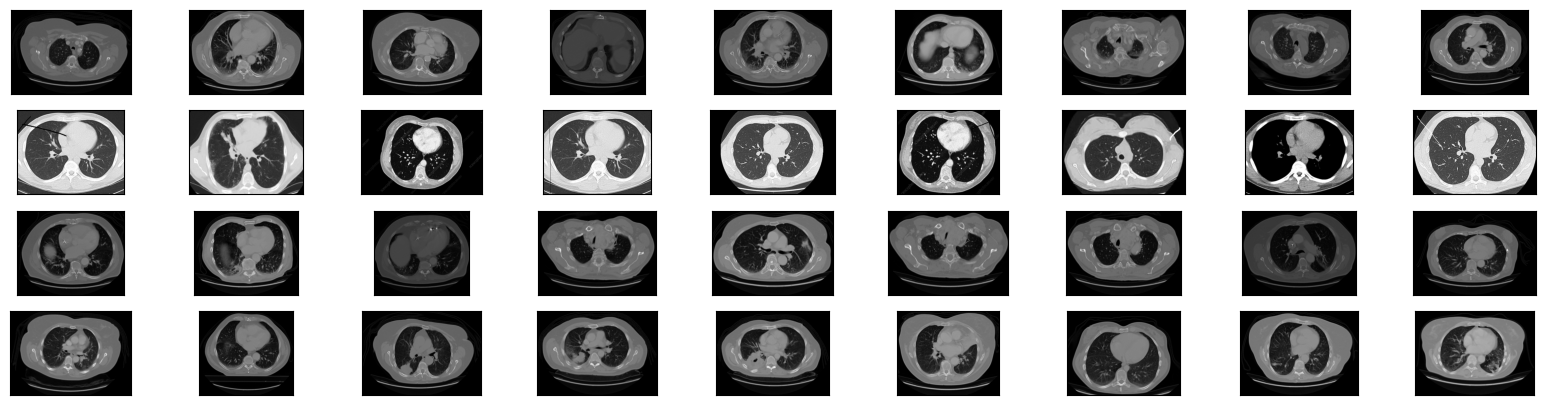

In [5]:
sample = load_images()
fig = plt.figure(figsize=(20,5)) # 20"x 5" plotting size is 20x5inch
l = 1 
shapes = [224,224,1] #3D array, 224 is the width and height and 1 is color channel which is black and white
#For showing the sample images, i used loop
for i in range(sample.shape[0]):
    for m in range(sample.shape[1]):
        ax = fig.add_subplot(4,9,m+l,xticks = [], yticks = []) # 4 rows and here is 9 columns, m+l here is subplot
        ax.imshow(np.squeeze(sample[i,m]))
        shapes.append(sample[i,m].shape)
    l +=9 # each row will show 9 images 

Import VGG16 library as shown, add preprocessing layer to the front of VGG.

Here I use imagenet weights

In [6]:
vgg_16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) # [1] because black and white picture only, but when i'm using imagenet i must use [3] other wise shows error

58889256/58889256 [==============================] - 0s 0us/step


trainable=flase --- because of transfer learning. 

In [8]:
for layer in vgg_16.layers:
  layer.trainable = False
   # trainable=flase --- because of transfer learning. 

In [9]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/try/Data/train/*')

In [10]:
# Conver to 1D
#x = Flatten()(vgg_16.output) 
# x = Dense(1000, activation='relu')(x)
#prediction = Dense(len(folders), activation='softmax')(x) # Fully connected layer with a softmax activation function. 

inputs = vgg_16.output  # vgg19 is the base model
flatten = Flatten()(inputs)
dropout = Dropout(0.2)(flatten)  # Add Dropout layer
prediction = Dense(len(folders), activation='softmax')(dropout)

In [11]:
model = Model(inputs=vgg_16.input, outputs=prediction) #creates a new model called model that takes the input from the pre-trained VGG-16 model and passes it through the prediction layer to produce the output.
#This model includes both the pre-trained layers of VGG16 and the new prediction layer and will be trained on the dataset to perform image classification

In [12]:
#model.compile(
#  loss='categorical_crossentropy',
#  optimizer='adam', # adam popular optimizer
#  metrics=['accuracy']
#)


learning_rate = 0.001

model.compile(
  loss='categorical_crossentropy',
  optimizer=Adam(learning_rate= learning_rate),
  metrics=['accuracy']
)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.1,
                                   horizontal_flip = True)

In [16]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/try/Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 613 images belonging to 4 classes.


In [18]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/try/Data/test',
                                            target_size = (224, 224),
                                            batch_size = 32, #32
                                            class_mode = 'categorical')

Found 315 images belonging to 4 classes.


In [19]:
# fit the model
r = model.fit_generator(
  training_set,
  #validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-19-3df9450a8b99>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
20/20 [==============================] - 161s 7s/step - loss: 1.4336 - accuracy: 0.4976
Epoch 2/5
20/20 [==============================] - 10s 514ms/step - loss: 0.5952 - accuracy: 0.7504
Epoch 3/5
20/20 [==============================] - 9s 459ms/step - loss: 0.3845 - accuracy: 0.8564
Epoch 4/5
20/20 [==============================] - 11s 525ms/step - loss: 0.2875 - accuracy: 0.9054
Epoch 5/5
20/20 [==============================] - 10s 512ms/step - loss: 0.2648 - accuracy: 0.9070


In [20]:
test_lebels = test_set.labels

In [21]:
test_set.image_shape

(224, 224, 3)

In [22]:
results = model.evaluate(test_set)

10/10 [==============================] - 55s 6s/step - loss: 0.8564 - accuracy: 0.6508


In [24]:
from keras.models import load_model

In [25]:
model.save('VGG16_LungCancer.h5')